In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import datetime
from matplotlib.mlab import PCA
from implementations import *
from costs import *
from helpers import *
from proj1_helpers import *
from method_comparison_helpers import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
# Load Train and Test Data
with zipfile.ZipFile("../data/test.csv.zip","r") as zip_ref:
    zip_ref.extractall("../data/")
DATA_TRAIN_PATH = '../data/train.csv' 
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)

## Exploratory data analysis

In [3]:
#Pure Numpy version

#Lets extract sparse columns which contain -999 values
columns = tx.min(axis=0)#tx_train.shape[1]
sparse_columns = np.array([])
for i, minimum in np.ndenumerate(columns):
    if -999 == minimum:
        sparse_columns = np.append(sparse_columns, [i])
sparse_columns = sparse_columns.astype(int)
print('Sparse columns:')        
print(sparse_columns)

# Lets replace -999 values with nan's
tx_nan = tx.copy()
tx_nan[tx_nan==-999]=np.nan
print(np.nanmean(tx_nan, axis=0))
print(np.nanstd(tx_nan, axis=0))
print(np.nanmin(tx_nan, axis=0))
print(np.nanmax(tx_nan, axis=0))

Sparse columns:
[ 0  4  5  6 12 23 24 25 26 27 28]
[  1.21858528e+02   4.92398193e+01   8.11819816e+01   5.78959617e+01
   2.40373503e+00   3.71783360e+02  -8.21688171e-01   2.37309984e+00
   1.89173324e+01   1.58432217e+02   1.43760943e+00  -1.28304708e-01
   4.58289801e-01   3.87074191e+01  -1.09730480e-02  -8.17107200e-03
   4.66602072e+01  -1.95074680e-02   4.35429640e-02   4.17172345e+01
  -1.01191920e-02   2.09797178e+02   9.79176000e-01   8.48221045e+01
  -3.27458741e-03  -1.23928255e-02   5.76794744e+01  -1.18452642e-02
  -1.58228913e-03   7.30645914e+01]
[  57.29802145   35.34481492   40.82860887   63.65555431    1.74221431
  397.69658434    3.58433731    0.78290955   22.2734492   115.70588372
    0.84474126    1.19358245    0.39867861   22.41203584    1.21407622
    1.81675941   22.06487828    1.26497962    1.81660763   32.8946274
    1.81221908  126.49925272    0.97742435   60.66207397    1.78454002
    1.81337943   31.98556122    2.0317286     1.8169372    98.01546598]
[  9

In [4]:
# PURE NUMPY VERSION

#Lets fill NaNs with -99
tx_99_filled = tx_nan.copy()
where_are_NaNs = np.isnan(tx_99_filled)
tx_99_filled[where_are_NaNs] = -99
print(np.mean(tx_99_filled, axis=0))
print(np.std(tx_99_filled, axis=0))
print(np.min(tx_99_filled, axis=0))
print(np.max(tx_99_filled, axis=0))

[  8.81873206e+01   4.92398193e+01   8.11819816e+01   5.78959617e+01
  -6.95754754e+01   3.76081493e+01  -7.05114029e+01   2.37309984e+00
   1.89173324e+01   1.58432217e+02   1.43760943e+00  -1.28304708e-01
  -7.01399891e+01   3.87074191e+01  -1.09730480e-02  -8.17107200e-03
   4.66602072e+01  -1.95074680e-02   4.35429640e-02   4.17172345e+01
  -1.01191920e-02   2.09797178e+02   9.79176000e-01   1.13572328e+01
  -3.95675139e+01  -3.95729880e+01  -5.35360035e+01  -7.02764092e+01
  -7.02734311e+01   7.30645914e+01]
[  95.31717441   35.34481492   40.82860887   63.65555431   46.03080284
  302.56471592   44.59921728    0.78290955   22.2734492   115.70588372
    0.84474126    1.19358245   45.13882163   22.41203584    1.21407622
    1.81675941   22.06487828    1.26497962    1.81660763   32.8946274
    1.81221908  126.49925272    0.97742435  101.57063002   48.51095712
   48.50713469   73.16534796   44.93827312   44.94026078   98.01546598]
[ -9.90000000e+01   0.00000000e+00   6.32900000e+00   0

In [5]:
# EXPLORATORY DATASET 1
# PURE NUMPY VERSION

#Lets fill NaNs with column's mean value
tx_mean_filled = tx_nan.copy()
#Obtain mean of columns as you need, nanmean is just convenient.
mean = np.nanmean(tx_mean_filled, axis=0)
#Find indicies that you need to replace
inds = np.where(np.isnan(tx_mean_filled))
#Place column means in the indices. Align the arrays using take
tx_mean_filled[inds]=np.take(mean,inds[1])
#Lets normalize
tx_mean_filled_normalized = (tx_mean_filled - tx_mean_filled.mean(axis=0)) / tx_mean_filled.std(axis=0, ddof=1)
print(np.mean(tx_mean_filled_normalized, axis=0))
print(np.std(tx_mean_filled_normalized, axis=0))
print(np.min(tx_mean_filled_normalized, axis=0))
print(np.max(tx_mean_filled_normalized, axis=0))

[ -9.73054681e-13   4.42750414e-15  -3.50538043e-15   7.10211001e-15
  -7.23440168e-12  -6.30188342e-12   6.80633033e-13   2.44147274e-14
   6.40282893e-15   2.86169444e-15  -6.95043934e-15   5.43928191e-15
   5.55859610e-13  -5.97410332e-15   1.30739863e-16   6.37561115e-17
   2.58283965e-14  -1.17813315e-16  -1.43046242e-16   8.24421384e-15
   1.23416388e-16  -8.96501851e-15  -1.91224281e-15   2.89132939e-12
  -2.77659665e-15   2.53467926e-14  -8.40723363e-12   2.09942845e-14
  -5.89750587e-15  -3.38248540e-16]
[ 0.999998  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998
  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998
  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998
  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998
  0.999998  0.999998]
[-2.1386682  -1.39312431 -1.8333427  -0.90951758 -2.56127609 -1.67194698
 -8.93117038 -2.76544782 -0.84932039 -0.97080623 -1.64619242 -1.07717127
 -2.13397163 -0.83470247 -2.0

In [6]:
# EXPLORATORY DATASET 2
# PURE NUMPY VERSION

#Lets fill NaNs with 0
tx_zero_filled = tx_nan.copy()
where_are_NaNs = np.isnan(tx_zero_filled)
tx_zero_filled[where_are_NaNs] = 0
#Lets normalize
tx_zero_filled_normalized = (tx_zero_filled - tx_zero_filled.mean(axis=0)) / tx_zero_filled.std(axis=0, ddof=1)
print(np.mean(tx_zero_filled_normalized, axis=0))
print(np.std(tx_zero_filled_normalized, axis=0))
print(np.min(tx_zero_filled_normalized, axis=0))
print(np.max(tx_zero_filled_normalized, axis=0))

[  2.23364047e-14   4.42750414e-15  -3.50538043e-15   7.10211001e-15
  -2.93632718e-15   4.56355265e-15  -1.32019273e-15   2.44147274e-14
   6.40282893e-15   2.86169444e-15  -6.95043934e-15   5.43928191e-15
  -7.47514495e-16  -5.97410332e-15   1.30739863e-16   6.37561115e-17
   2.58283965e-14  -1.17813315e-16  -1.43046242e-16   8.24421384e-15
   1.23416388e-16  -8.96501851e-15  -1.91224281e-15  -3.99443056e-15
  -1.46157516e-15   1.15313340e-15   8.03767719e-16   2.29318138e-15
   9.35779405e-18  -3.38248540e-16]
[ 0.999998  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998
  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998
  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998
  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998
  0.999998  0.999998]
[-1.50629043 -1.39312431 -1.8333427  -0.90951758 -0.48469228 -0.3956052
 -9.06570778 -2.76544782 -0.84932039 -0.97080623 -1.64619242 -1.07717127
 -0.4448063  -0.83470247 -2.04

In [7]:
# EXPLORATORY DATASET 3
# PURE NUMPY

# Lets sum all sprase columns and combine it into new one
tx_sparse_dropped = tx_nan.copy()
sparse_sum = np.array([np.nansum(tx_sparse_dropped[:,sparse_columns],axis=1)]).T
# print(sparse_sum)
# Delete sparse columns
tx_sparse_dropped = np.delete(tx_sparse_dropped, sparse_columns, axis=1)
tx_sparse_dropped = np.hstack((tx_sparse_dropped, sparse_sum))
# Normalize
tx_sparse_dropped_normalized = (tx_sparse_dropped - tx_sparse_dropped.mean(axis=0)) / tx_sparse_dropped.std(axis=0, ddof=1)

print(np.mean(tx_sparse_dropped_normalized, axis=0))
print(np.std(tx_sparse_dropped_normalized, axis=0))
print(np.min(tx_sparse_dropped_normalized, axis=0))
print(np.max(tx_sparse_dropped_normalized, axis=0))

[  4.26041424e-17  -3.41344730e-17   4.39968062e-17  -5.14489784e-16
  -4.54178917e-16  -1.03796083e-16   3.72608611e-16  -2.67732503e-17
   4.05663059e-16   1.45519152e-17   4.18367563e-17  -5.93217919e-16
   1.21644916e-17   3.63797881e-17  -3.88808985e-16  -2.22541985e-17
  -4.51649385e-16  -8.70272743e-17  -2.55027999e-16  -2.43858267e-16]
[ 0.999998  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998
  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998
  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998]
[-1.39312431 -1.8333427  -0.90951758 -2.76544782 -0.84932039 -0.97080623
 -1.64619242 -1.07717127 -0.83470247 -2.04931283 -1.72495193 -0.93633718
 -1.96484396 -1.75356337 -1.26489201 -1.72819864 -1.55035529 -1.0017901
 -0.74543792 -0.81372095]
[  18.13091681   31.06073209   43.62694684    4.22896045  126.43196882
   14.64079734   21.70528997    1.29216178   32.37988439    2.06574183
    1.73394713   23.27725352    1.99410519    1.7056247    85.14

In [8]:
# EXPLORATORY 4
# PURE NUMPY VERSION

# instead of -999 we have -99
tx_99_filled = tx_nan.copy()
where_are_NaNs = np.isnan(tx_99_filled)
tx_99_filled[where_are_NaNs] = -99
#Lets normalize
tx_99_filled_normalized = (tx_99_filled - tx_99_filled.mean(axis=0)) / tx_99_filled.std(axis=0, ddof=1)
print(np.mean(tx_99_filled_normalized, axis=0))
print(np.std(tx_99_filled_normalized, axis=0))
print(np.min(tx_99_filled_normalized, axis=0))
print(np.max(tx_99_filled_normalized, axis=0))

[  2.26744223e-15   4.42750414e-15  -3.50538043e-15   7.10211001e-15
  -1.33943638e-14  -1.39703982e-15  -5.66382941e-15   2.44147274e-14
   6.40282893e-15   2.86169444e-15  -6.95043934e-15   5.43928191e-15
   1.41423655e-14  -5.97410332e-15   1.30739863e-16   6.37561115e-17
   2.58283965e-14  -1.17813315e-16  -1.43046242e-16   8.24421384e-15
   1.23416388e-16  -8.96501851e-15  -1.91224281e-15   1.60393121e-15
  -1.40815182e-15   1.79682207e-14  -9.98180472e-15  -2.31390382e-14
  -3.55215501e-15  -3.38248540e-16]
[ 0.999998  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998
  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998
  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998
  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998
  0.999998  0.999998]
[-1.9638323  -1.39312431 -1.8333427  -0.90951758 -0.63923425 -0.45149969
 -0.63876772 -2.76544782 -0.84932039 -0.97080623 -1.64619242 -1.07717127
 -0.63935991 -0.83470247 -2.0

In [9]:
import itertools  

# Polynomial helper functions

def power_of_n_tx(x, n):
    return x**n

def power_of_n_combined(x, n):
    power_of_n_comb = x
    for degree in range(2, n+1):
        power_of_degree = np.apply_along_axis(power_of_n_tx, 1, x, degree)
        power_of_n_comb = np.hstack((power_of_n_comb, power_of_degree))
    return power_of_n_comb

def combinations(array2d, indeces_list_a, indeces_list_b):
    combinations = list(itertools.product(indeces_list_a, indeces_list_b))
    for comb in combinations:
        new_feature = np.array([array2d[:,comb[0]] * array2d[:,comb[1]]]).T
        array2d = np.hstack((array2d, new_feature))
    return array2d

# arr = np.array([[1,2],[1,2],[1,2]])
# print(arr)
# combinations(arr, [0], [1])
#         numpy.apply_along_axis

In [10]:
# Exploratory DATASET 5
# normalized -99 filled dataset with base dimensions, 
# (base dimensions)^2 and (base dimensions)^3 and permutatons of dimensions which are highly corelated 
# PURE NUMPY VERSION

tx_polynomial = tx_nan.copy()
tx_polynomial = power_of_n_combined(tx_polynomial, 9)

tx_polynomial_normalized = (tx_polynomial - np.nanmean(tx_polynomial, axis=0)) / np.nanstd(tx_polynomial, axis=0, ddof=1)
tx_polynomial_normalized = combinations(tx_polynomial_normalized, [0], [1,2,6,7,])
tx_polynomial_normalized = combinations(tx_polynomial_normalized, [2], [6,7])
tx_polynomial_normalized = combinations(tx_polynomial_normalized, [3], [6,9,19,21,23,29])
tx_polynomial_normalized = combinations(tx_polynomial_normalized, [4], [5,6])
tx_polynomial_normalized = combinations(tx_polynomial_normalized, [5], [6])
tx_polynomial_normalized = combinations(tx_polynomial_normalized, [6], [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29])
tx_polynomial_normalized = combinations(tx_polynomial_normalized, [9], [10,13,16,19,21,23,26,29])
tx_polynomial_normalized = combinations(tx_polynomial_normalized, [10], [13,16])
tx_polynomial_normalized = combinations(tx_polynomial_normalized, [21], [23,26,29])
tx_polynomial_normalized = combinations(tx_polynomial_normalized, [23], [26,29])
tx_polynomial_normalized = combinations(tx_polynomial_normalized, [26], [29])
where_are_NaNs = np.isnan(tx_polynomial_normalized)
tx_polynomial_normalized[where_are_NaNs] = -5 #because np.min(np.nanmin(tx_polynomial_normalized, axis=0)) = -85
ones = np.ones((tx_polynomial_normalized.shape[0],1))
tx_polynomial_normalized = np.hstack((ones, tx_polynomial_normalized))
print(tx_polynomial_normalized.shape)

(250000, 324)


In [11]:
# Exploratory DATASET 6
# binarized categories, normalized -99 filled dataset with base dimensions, 
# (base dimensions)^2 and permutatons of dimensions which are highly corelated 
# PURE NUMPY VERSION

tx_bin_polynomial = tx_nan.copy()
tx_bin_polynomial = power_of_n_combined(tx_bin_polynomial, 9)

categories_list = np.unique(tx_bin_polynomial[:,22]).astype(int)
categories = np.empty(shape=[tx_bin_polynomial.shape[0], 0])
for cat in categories_list:
    zeros = np.zeros((tx_bin_polynomial.shape[0], 1))
    inds = np.where(tx_bin_polynomial[:,22] == cat)
    zeros[inds,0] = 1
    categories = np.hstack((categories, zeros))
tx_bin_polynomial = np.hstack((categories, tx_bin_polynomial))
tx_bin_polynomial = np.delete(tx_bin_polynomial, [22], axis=1)
tx_bin_polynomial_normalized = (tx_bin_polynomial - np.nanmean(tx_bin_polynomial, axis=0)) / np.nanstd(tx_bin_polynomial, axis=0, ddof=1)
tx_bin_polynomial_normalized = combinations(tx_bin_polynomial_normalized, [0], [1,2,6,7,])
tx_bin_polynomial_normalized = combinations(tx_bin_polynomial_normalized, [2], [6,7])
tx_bin_polynomial_normalized = combinations(tx_bin_polynomial_normalized, [3], [6,9,19,21,23,29])
tx_bin_polynomial_normalized = combinations(tx_bin_polynomial_normalized, [4], [5,6])
tx_bin_polynomial_normalized = combinations(tx_bin_polynomial_normalized, [5], [6])
tx_bin_polynomial_normalized = combinations(tx_bin_polynomial_normalized, [6], [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29])
tx_bin_polynomial_normalized = combinations(tx_bin_polynomial_normalized, [9], [10,13,16,19,21,23,26,29])
tx_bin_polynomial_normalized = combinations(tx_bin_polynomial_normalized, [10], [13,16])
tx_bin_polynomial_normalized = combinations(tx_bin_polynomial_normalized, [21], [23,26,29])
tx_bin_polynomial_normalized = combinations(tx_bin_polynomial_normalized, [23], [26,29])
tx_bin_polynomial_normalized = combinations(tx_bin_polynomial_normalized, [26], [29])
where_are_NaNs = np.isnan(tx_bin_polynomial_normalized)
tx_bin_polynomial_normalized[where_are_NaNs] = -5 #because np.min(np.nanmin(tx_bin_polynomial_normalized, axis=0)) = -85
ones = np.ones((tx_bin_polynomial_normalized.shape[0],1))
tx_bin_polynomial_normalized = np.hstack((ones, tx_bin_polynomial_normalized))
print(tx_bin_polynomial_normalized.shape)

(250000, 327)


In [12]:
# Lets do exactly the same for Predtiction dataset
# PURE NUMPY VERSION
DATA_PRED_PATH = '../data/test.csv'
_, tx_pred, ids_pred = load_csv_data(DATA_PRED_PATH)

# Lets replace -999 values with nan's
tx_pred_nan = tx_pred.copy()
tx_pred_nan[tx_pred_nan==-999]=np.nan

# EXPLORATORY DATASET 1
#Lets fill NaNs with column's mean value
tx_pred_mean_filled = tx_pred_nan.copy()
#Obtain mean of columns as you need, nanmean is just convenient.
mean = np.nanmean(tx_pred_mean_filled, axis=0)
#Find indicies that you need to replace
inds = np.where(np.isnan(tx_pred_mean_filled))
#Place column means in the indices. Align the arrays using take
tx_pred_mean_filled[inds]=np.take(mean,inds[1])
#Lets normalize
tx_pred_mean_filled_normalized = (tx_pred_mean_filled - tx_pred_mean_filled.mean(axis=0)) / tx_pred_mean_filled.std(axis=0, ddof=1)


# EXPLORATORY DATASET 2
#Lets fill NaNs with 0
tx_pred_zero_filled = tx_pred_nan.copy()
where_are_NaNs = np.isnan(tx_pred_zero_filled)
tx_pred_zero_filled[where_are_NaNs] = 0
#Lets normalize
tx_pred_zero_filled_normalized = (tx_pred_zero_filled - tx_pred_zero_filled.mean(axis=0)) / tx_pred_zero_filled.std(axis=0, ddof=1)


# EXPLORATORY DATASET 3
# Lets sum all sprase columns and combine it into new one
tx_pred_sparse_dropped = tx_pred_nan.copy()
sparse_sum = np.array([np.nansum(tx_pred_sparse_dropped[:,sparse_columns],axis=1)]).T
# print(sparse_sum)
# Delete sparse columns
tx_pred_sparse_dropped = np.delete(tx_pred_sparse_dropped, sparse_columns, axis=1)
tx_pred_sparse_dropped = np.hstack((tx_pred_sparse_dropped, sparse_sum))
# Normalize
tx_pred_sparse_dropped_normalized = (tx_pred_sparse_dropped - tx_pred_sparse_dropped.mean(axis=0)) / tx_pred_sparse_dropped.std(axis=0, ddof=1)


# EXPLORATORY 4
# instead of -999 we have -99
tx_pred_99_filled = tx_pred_nan.copy()
where_are_NaNs = np.isnan(tx_pred_99_filled)
tx_pred_99_filled[where_are_NaNs] = -99
#Lets normalize
tx_pred_99_filled_normalized = (tx_pred_99_filled - tx_pred_99_filled.mean(axis=0)) / tx_pred_99_filled.std(axis=0, ddof=1)

# Exploratory DATASET 5
# normalized -5 filled dataset with base dimensions, 
# (base dimensions)^2 and permutatons of dimensions which are highly corelated 
tx_pred_polynomial = tx_pred_nan.copy()
tx_pred_polynomial = power_of_n_combined(tx_pred_polynomial, 9)
tx_pred_polynomial_normalized = (tx_pred_polynomial - np.nanmean(tx_pred_polynomial, axis=0)) / np.nanstd(tx_pred_polynomial, axis=0, ddof=1)
tx_pred_polynomial_normalized = combinations(tx_pred_polynomial_normalized, [0], [1,2,6,7,])
tx_pred_polynomial_normalized = combinations(tx_pred_polynomial_normalized, [2], [6,7])
tx_pred_polynomial_normalized = combinations(tx_pred_polynomial_normalized, [3], [6,9,19,21,23,29])
tx_pred_polynomial_normalized = combinations(tx_pred_polynomial_normalized, [4], [5,6])
tx_pred_polynomial_normalized = combinations(tx_pred_polynomial_normalized, [5], [6])
tx_pred_polynomial_normalized = combinations(tx_pred_polynomial_normalized, [6], [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29])
tx_pred_polynomial_normalized = combinations(tx_pred_polynomial_normalized, [9], [10,13,16,19,21,23,26,29])
tx_pred_polynomial_normalized = combinations(tx_pred_polynomial_normalized, [10], [13,16])
tx_pred_polynomial_normalized = combinations(tx_pred_polynomial_normalized, [21], [23,26,29])
tx_pred_polynomial_normalized = combinations(tx_pred_polynomial_normalized, [23], [26,29])
tx_pred_polynomial_normalized = combinations(tx_pred_polynomial_normalized, [26], [29])

where_are_NaNs = np.isnan(tx_pred_polynomial_normalized)
tx_pred_polynomial_normalized[where_are_NaNs] = -5

ones = np.ones((tx_pred_polynomial_normalized.shape[0],1))
tx_pred_polynomial_normalized = np.hstack((ones, tx_pred_polynomial_normalized))
print(tx_pred_polynomial_normalized.shape)

# Exploratory DATASET 6
# binarized categories, normalized -99 filled dataset with base dimensions, 
# (base dimensions)^2 and permutatons of dimensions which are highly corelated 
tx_pred_bin_polynomial = tx_pred_nan.copy()
tx_pred_bin_polynomial = power_of_n_combined(tx_pred_bin_polynomial, 9)
categories_list = np.unique(tx_pred_bin_polynomial[:,22]).astype(int)
categories = np.empty(shape=[tx_pred_bin_polynomial.shape[0], 0])
for cat in categories_list:
    zeros = np.zeros((tx_pred_bin_polynomial.shape[0], 1))
    inds = np.where(tx_pred_bin_polynomial[:,22] == cat)
    zeros[inds,0] = 1
    categories = np.hstack((categories, zeros))
    
tx_pred_bin_polynomial = np.hstack((categories, tx_pred_bin_polynomial))
tx_pred_bin_polynomial = np.delete(tx_pred_bin_polynomial, [22], axis=1)
tx_pred_bin_polynomial_normalized = (tx_pred_bin_polynomial - np.nanmean(tx_pred_bin_polynomial, axis=0)) / np.nanstd(tx_pred_bin_polynomial, axis=0, ddof=1)
tx_pred_bin_polynomial_normalized = combinations(tx_pred_bin_polynomial_normalized, [0], [1,2,6,7,])
tx_pred_bin_polynomial_normalized = combinations(tx_pred_bin_polynomial_normalized, [2], [6,7])
tx_pred_bin_polynomial_normalized = combinations(tx_pred_bin_polynomial_normalized, [3], [6,9,19,21,23,29])
tx_pred_bin_polynomial_normalized = combinations(tx_pred_bin_polynomial_normalized, [4], [5,6])
tx_pred_bin_polynomial_normalized = combinations(tx_pred_bin_polynomial_normalized, [5], [6])
tx_pred_bin_polynomial_normalized = combinations(tx_pred_bin_polynomial_normalized, [6], [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29])
tx_pred_bin_polynomial_normalized = combinations(tx_pred_bin_polynomial_normalized, [9], [10,13,16,19,21,23,26,29])
tx_pred_bin_polynomial_normalized = combinations(tx_pred_bin_polynomial_normalized, [10], [13,16])
tx_pred_bin_polynomial_normalized = combinations(tx_pred_bin_polynomial_normalized, [21], [23,26,29])
tx_pred_bin_polynomial_normalized = combinations(tx_pred_bin_polynomial_normalized, [23], [26,29])
tx_pred_bin_polynomial_normalized = combinations(tx_pred_bin_polynomial_normalized, [26], [29])

where_are_NaNs = np.isnan(tx_pred_bin_polynomial_normalized)
tx_pred_bin_polynomial_normalized[where_are_NaNs] = -5 #because np.min(np.nanmin(tx_pred_bin_polynomial_normalized, axis=0)) = -85

ones = np.ones((tx_pred_bin_polynomial_normalized.shape[0],1))
tx_pred_bin_polynomial_normalized = np.hstack((ones, tx_pred_bin_polynomial_normalized))
print(tx_pred_bin_polynomial_normalized.shape)

(568238, 324)
(568238, 327)


In [13]:
# Lets split tx to train and test
split_ratio = 0.1
tx_train, tx_test, y_train, y_test = split_data(tx, y, split_ratio)
tx_zero_filled_normalized_train, tx_zero_filled_normalized_test, y_zero_filled_normalized_train, y_zero_filled_normalized_test = split_data(tx_zero_filled_normalized, y, split_ratio)
tx_mean_filled_normalized_train, tx_mean_filled_normalized_test, y_mean_filled_normalized_train, y_mean_filled_normalized_test = split_data(tx_mean_filled_normalized, y, split_ratio)
tx_sparse_dropped_normalized_train, tx_sparse_dropped_normalized_test, y_sparse_dropped_normalized_train, y_sparse_dropped_normalized_test = split_data(tx_sparse_dropped_normalized, y, split_ratio)
tx_99_filled_normalized_train, tx_99_filled_normalized_test, y_99_filled_normalized_train, y_99_filled_normalized_test = split_data(tx_99_filled_normalized, y, split_ratio)
tx_polynomial_normalized_train, tx_polynomial_normalized_test, y_polynomial_normalized_train, y_polynomial_normalized_test = split_data(tx_polynomial_normalized, y, split_ratio)
tx_bin_polynomial_normalized_train, tx_bin_polynomial_normalized_test, y_bin_polynomial_normalized_train, y_bin_polynomial_normalized_test = split_data(tx_bin_polynomial_normalized, y, split_ratio)

In [14]:
# Create list of datasets

# Test datasets
train_datasets = [tx_train, tx_zero_filled_normalized_train, tx_mean_filled_normalized_train, tx_sparse_dropped_normalized_train, tx_99_filled_normalized_train, tx_polynomial_normalized_train, tx_bin_polynomial_normalized_train]
new_train_datasets = [tx_zero_filled_normalized_train, tx_mean_filled_normalized_train, tx_sparse_dropped_normalized_train, tx_99_filled_normalized_train, tx_polynomial_normalized_train, tx_bin_polynomial_normalized_train]
poly_train_datasets = [tx_polynomial_normalized_train, tx_bin_polynomial_normalized_train]

# Test datasets
test_datasets = [tx_test, tx_zero_filled_normalized_test, tx_mean_filled_normalized_test, tx_sparse_dropped_normalized_test, tx_99_filled_normalized_test, tx_polynomial_normalized_test, tx_bin_polynomial_normalized_test]
new_test_datasets = [tx_zero_filled_normalized_test, tx_mean_filled_normalized_test, tx_sparse_dropped_normalized_test, tx_99_filled_normalized_test, tx_polynomial_normalized_test, tx_bin_polynomial_normalized_test]
poly_test_datasets = [tx_polynomial_normalized_test, tx_bin_polynomial_normalized_test]


# Prediction datasets
pred_datasets = [tx_pred, tx_pred_mean_filled_normalized, tx_pred_zero_filled_normalized, tx_pred_sparse_dropped_normalized, tx_pred_99_filled_normalized, tx_pred_polynomial_normalized, tx_pred_bin_polynomial_normalized]
new_pred_datasets = [tx_pred_mean_filled_normalized, tx_pred_zero_filled_normalized, tx_pred_sparse_dropped_normalized, tx_pred_99_filled_normalized, tx_pred_polynomial_normalized, tx_pred_bin_polynomial_normalized]
poly_pred_datasets = [tx_pred_polynomial_normalized, tx_pred_bin_polynomial_normalized]

datasets_names = ['Original/Raw', 'Zero filled', 'Mean filled', 'NaN dropped', '-99 filled', 'Polynomial', 'Binary Category Polynomial']
new_datasets_names = ['Zero filled', 'Mean filled', 'NaN dropped', '-99 filled', 'Polynomial', 'Binary Category Polynomial']
poly_datasets_names = ['Polynomial', 'Binary Category Polynomial']

## Logistic Regression

In [15]:
#Parameters 
max_iters = 100
gammas = np.logspace(-12, -8, 10)

Logistic Regression for Polynomial: execution time=8.228 seconds.


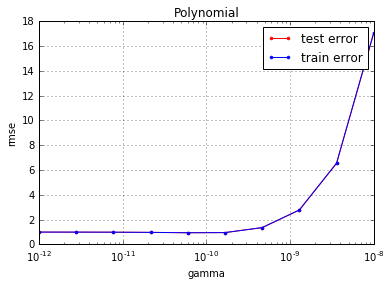

In [16]:
train, test, weight = logistic_regression_dataset_gammas_test(y_polynomial_normalized_train,
                                                              y_polynomial_normalized_test,
                                                              tx_polynomial_normalized_train, 
                                                              tx_polynomial_normalized_test,
                                                              max_iters,
                                                              gammas, 
                                                              'Polynomial',
                                                              1)

Logistic Regression for Zero filled: execution time=0.861 seconds.
Logistic Regression for Mean filled: execution time=0.751 seconds.
Logistic Regression for NaN dropped: execution time=0.664 seconds.
Logistic Regression for -99 filled: execution time=0.905 seconds.


/Users/mateusz/Dropbox/EPFL/Semester I/Machnie Learning CS-433/My Answers/MachineLearning/Projects/project1/scripts/implementations.py:192: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Logistic Regression for Polynomial: execution time=7.729 seconds.
Logistic Regression for Binary Category Polynomial: execution time=7.199 seconds.


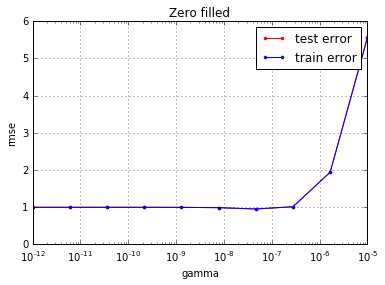

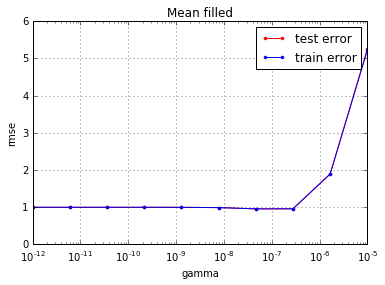

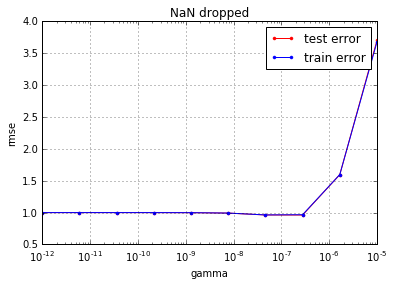

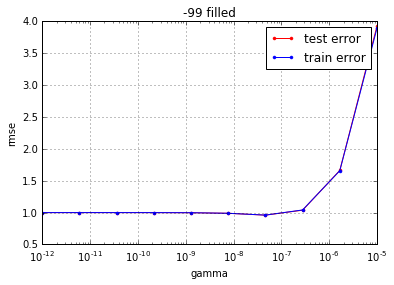

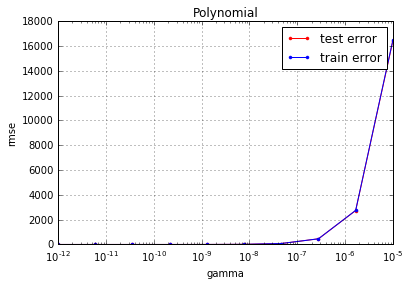

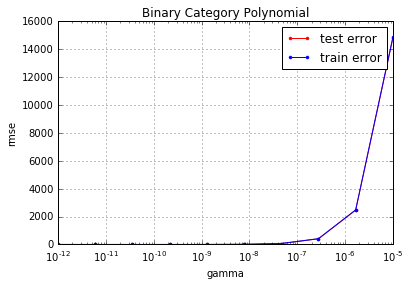

In [17]:
# Logistic Regression of all datasets vs gammas. 
# WARNING Takes a lot of time for all datasets (~30 min)

#Parameters 
max_iters = 100
gammas = np.logspace(-12, -5, 10)

for i in range(len(new_train_datasets)):
    # Parameters
    train_dataset = new_train_datasets[i]
    test_dataset = new_test_datasets[i]
    dataset_name = new_datasets_names[i]
    figure_id = i
    
    logistic_regression_dataset_gammas_test(y_train,
                                            y_test,
                                            train_dataset,
                                            test_dataset,
                                            max_iters,
                                            gammas,
                                            dataset_name,
                                            figure_id)

## Least Squares

### Gradient Descent

Gradient Descent for Zero filled: execution time=0.613 seconds. Train RMSE Loss=0.9623390015584948, Test RMSE Loss=0.9615080697654578
Gradient Descent for Mean filled: execution time=0.521 seconds. Train RMSE Loss=0.9656908034325367, Test RMSE Loss=0.964630450872205
Gradient Descent for NaN dropped: execution time=0.324 seconds. Train RMSE Loss=0.9701048221741067, Test RMSE Loss=0.969393021026873
Gradient Descent for -99 filled: execution time=0.541 seconds. Train RMSE Loss=0.9654938114513678, Test RMSE Loss=0.964946223292055
Gradient Descent for Polynomial: execution time=8.092 seconds. Train RMSE Loss=0.8632263575888733, Test RMSE Loss=0.8638774448574378
Gradient Descent for Binary Category Polynomial: execution time=7.506 seconds. Train RMSE Loss=0.8653794751607204, Test RMSE Loss=0.865022998572289


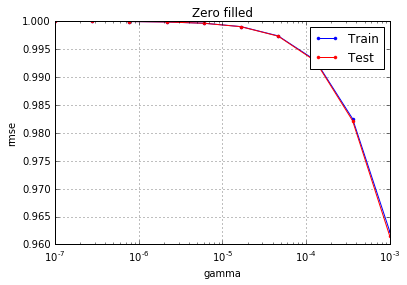

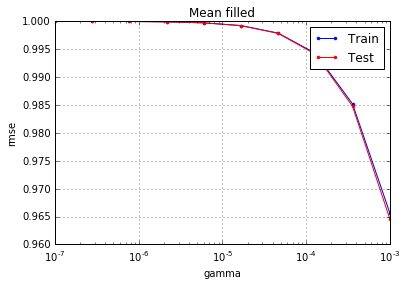

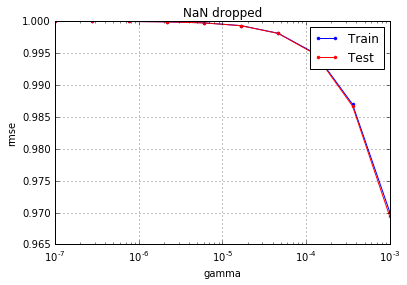

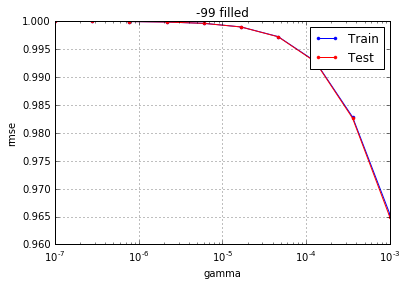

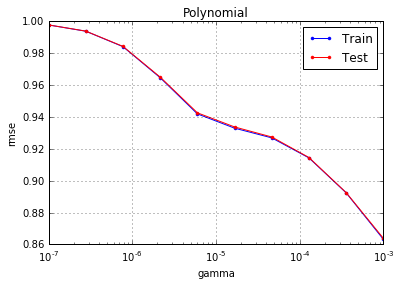

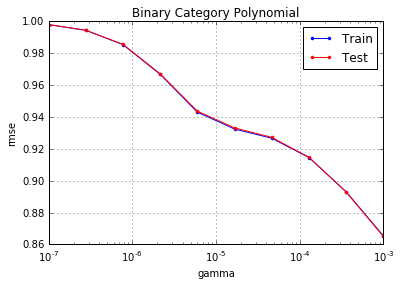

In [18]:
max_iters = 100
gammas = np.logspace(-7, -3, 10)
for i in range(len(new_train_datasets)):
    # Parameters
    train_dataset = new_train_datasets[i]
    test_dataset = new_test_datasets[i]
    dataset_name = new_datasets_names[i]
    figure_id = i
    
    least_squares_GD_gammas_test(y_train, y_test, train_dataset, test_dataset, gammas, max_iters, dataset_name, figure_id)

Lest Squares: execution time=0.006 seconds. RMSE Train Loss=0.8847544922693048, Test Loss=0.8816321868713402
Lest Squares: execution time=0.005 seconds. RMSE Train Loss=0.8874899601841313, Test Loss=0.8830551506453657
Lest Squares: execution time=0.004 seconds. RMSE Train Loss=0.8875475299243812, Test Loss=0.8844199146568177
Lest Squares: execution time=0.005 seconds. RMSE Train Loss=0.8849957543025091, Test Loss=0.8821596472366707
Lest Squares: execution time=0.088 seconds. RMSE Train Loss=0.7340893324006066, Test Loss=143751744.78943786
Lest Squares: execution time=0.089 seconds. RMSE Train Loss=0.7309567597261308, Test Loss=86504963.28914317


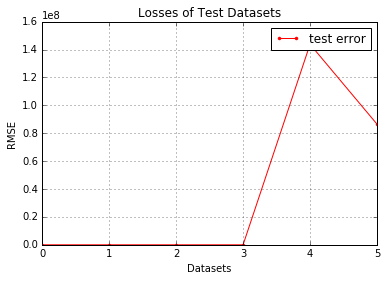

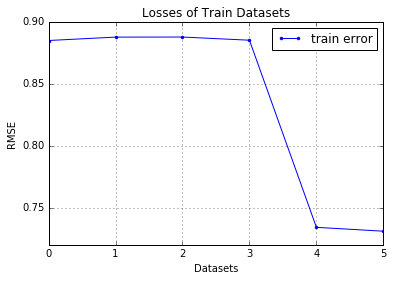

In [19]:
train_losses = []
test_losses = []
weights = []
for i in range(len(new_train_datasets)):
    train_dataset = new_train_datasets[i]
    test_dataset = new_test_datasets[i]
    dataset_name = new_datasets_names[i]
    
    start_time = datetime.datetime.now()
    least_squares_w, train_rmse  = least_squares(y_train, train_dataset)
    weights.append(least_squares_w)

    test_rmse = compute_RMSE(y_test, test_dataset, least_squares_w)
    
    train_losses = np.append(train_losses, train_rmse)
    test_losses = np.append(test_losses, test_rmse)
    
    end_time = datetime.datetime.now()
    exection_time = (end_time - start_time).total_seconds()
    print("Lest Squares: execution time={t:.3f} seconds. RMSE Train Loss={l}, Test Loss={tl}".format(t=exection_time, l=train_rmse, tl=test_rmse))

plt.figure(1)
plt.title("Losses of Test Datasets")
plt.plot(range(len(new_train_datasets)), test_losses, marker=".", color='r', label='test error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()
plt.figure(2)
plt.title("Losses of Train Datasets")
plt.plot(range(len(new_train_datasets)), train_losses, marker=".", color='b', label='train error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()

In [20]:
least_squares_w, train_rmse = least_squares(y_polynomial_normalized_train,
                                            tx_polynomial_normalized_train)

test_rmse = compute_RMSE(y_polynomial_normalized_test,
                         tx_polynomial_normalized_test,
                         least_squares_w)
print(train_rmse, test_rmse)

0.734089332401 143751744.789


In [21]:

tx_all = tx_polynomial_normalized_test

y_pred_mean = predict_labels(least_squares_w, tx_all)
y_pred_mean = np.reshape(y_pred_mean, (len(y_pred_mean), 1))


y1 = np.array([y_test]).T
# print(y1.shape)

f1_rid_mean = sum(abs(y1-y_pred_mean))/(2*len(y_pred_mean))

print('Accuracy: ', 1-f1_rid_mean)

Accuracy:  [ 0.81727111]


## Ridge Regression

Ridge Regression for Zero filled: execution time=0.588 seconds.
Ridge Regression for Mean filled: execution time=0.580 seconds.
Ridge Regression for NaN dropped: execution time=0.414 seconds.
Ridge Regression for -99 filled: execution time=0.545 seconds.
Ridge Regression for Polynomial: execution time=8.655 seconds.
Ridge Regression for Binary Category Polynomial: execution time=9.349 seconds.


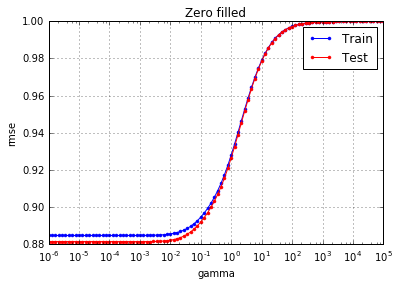

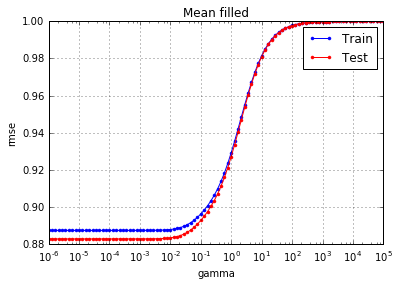

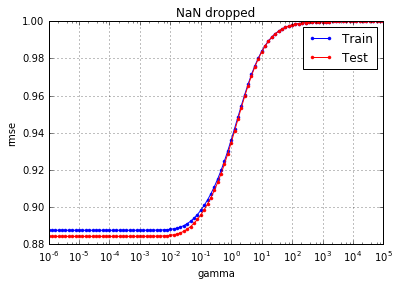

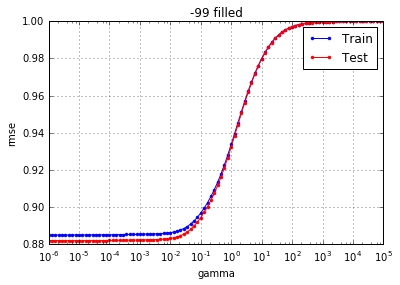

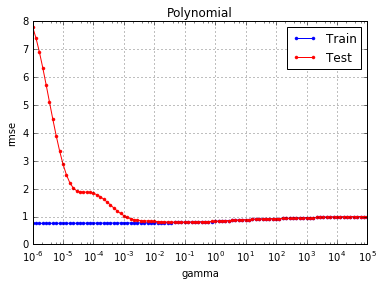

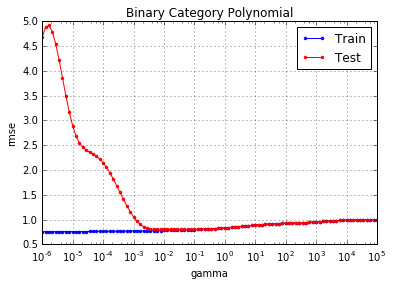

In [27]:
lambdas = np.logspace(-6, 5, 100)
for i in range(len(new_train_datasets)):
    # Parameters
    train_dataset = new_train_datasets[i]
    test_dataset = new_test_datasets[i]
    dataset_name = new_datasets_names[i]
    figure_id = i
    ridge_regression_dataset_lamdas_test(y_train, y_test, train_dataset, test_dataset, lambdas, dataset_name, figure_id)


In [28]:
# Parameters
lamb = 0.0599484250319
ridge_regression_gradient_w, train_rmse = ridge_regression(y_polynomial_normalized_train,
                                                           tx_polynomial_normalized_train,
                                                           lamb)
test_rmse = compute_RMSE(y_polynomial_normalized_test,
                         tx_polynomial_normalized_test,
                         ridge_regression_gradient_w)
print(train_rmse)
print(test_rmse)

0.790486603347
0.799866219125


In [29]:
tx_all = tx_polynomial_normalized

y_pred_mean = predict_labels(ridge_regression_gradient_w, tx_all)
y_pred_mean = np.reshape(y_pred_mean, (len(y_pred_mean), 1))

y1 = np.array([y]).T

f1_rid_mean = sum(abs(y1-y_pred_mean))/(2*len(y_pred_mean))

print('Accuracy: ',1-f1_rid_mean)

Accuracy:  [ 0.779312]


Ridge Regression for Zero filled: execution time=0.007 seconds. Test RMSE Loss=0.7998662191249685, Train RMSE Loss=0.8911470231627352
Ridge Regression for Mean filled: execution time=0.007 seconds. Test RMSE Loss=0.7998662191249685, Train RMSE Loss=0.8930120702475677
Ridge Regression for NaN dropped: execution time=0.005 seconds. Test RMSE Loss=0.7998662191249685, Train RMSE Loss=0.8941173586104271
Ridge Regression for -99 filled: execution time=0.007 seconds. Test RMSE Loss=0.7998662191249685, Train RMSE Loss=0.8926477699118367
Ridge Regression for Polynomial: execution time=0.109 seconds. Test RMSE Loss=0.7998662191249685, Train RMSE Loss=0.7904866033465372
Ridge Regression for Binary Category Polynomial: execution time=0.097 seconds. Test RMSE Loss=0.7998662191249685, Train RMSE Loss=0.7946614079909746


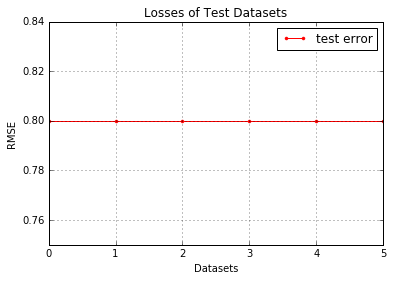

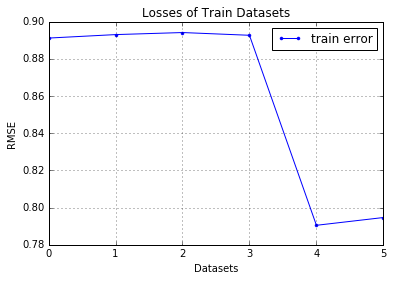

In [30]:
train_losses = []
test_losses = []
for i in range(len(new_train_datasets)):
    train_dataset = new_train_datasets[i]
    test_dataset = new_test_datasets[i]
    dataset_name = new_datasets_names[i]
    
    start_time = datetime.datetime.now()
    ridge_regression_gradient_w, ridge_regression_loss,  = ridge_regression(y_train, train_dataset, lamb)

    train_losses = np.append(train_losses, ridge_regression_loss)

    test_RMSe = compute_RMSE(y_test, test_dataset, ridge_regression_gradient_w)
    test_losses = np.append(test_losses, test_rmse)
    
    end_time = datetime.datetime.now()
    exection_time = (end_time - start_time).total_seconds()
    print("Ridge Regression for {dn}: execution time={t:.3f} seconds. Test RMSE Loss={l}, Train RMSE Loss={tl}".format(dn = dataset_name, t=exection_time, l=test_rmse, tl=ridge_regression_loss))

plt.figure(1)
plt.title("Losses of Test Datasets")
plt.plot(range(len(new_train_datasets)), test_losses, marker=".", color='r', label='test error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()
plt.figure(2)
plt.title("Losses of Train Datasets")
plt.plot(range(len(new_train_datasets)), train_losses, marker=".", color='b', label='train error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()

## Cross validation


Cross Validation: execution time=14.508 seconds.


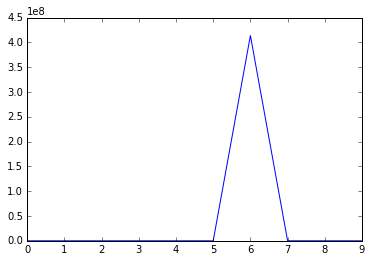

In [31]:
from plots import cross_validation_visualization

subset_y = y
subset_tx = tx_polynomial_normalized


# Define the parameters of the algorithm.
seed = 15
k_fold = 10
lambdas = np.logspace(-16, 2, 1)

rmse_tr = []
rmse_te = []
# weights = np.empty((0,subset_tx.shape[1]), float)
start_time = datetime.datetime.now()

for lambd in np.nditer(lambdas):
    w, loss_tr, loss_te = cross_validation_LS(subset_y, subset_tx, k_fold, seed) #least squares
    rmse_tr = np.append(rmse_tr, loss_tr)
    rmse_te = np.append(rmse_te, loss_te)
#     weights = np.vstack((weights, w))
        
end_time = datetime.datetime.now()
exection_time = (end_time - start_time).total_seconds()

print("Cross Validation: execution time={t:.3f} seconds.".format(t=exection_time))
# cross_validation_visualization(lambdas, rmse_tr, rmse_te)
plt.plot(range(k_fold), rmse_te)
plt.plot(range(k_fold), rmse_tr)

In [ ]:
OUTPUT_PATH = '../data/least_squares_5th_polynomial_submission.csv'
weights_pred = least_squares_w #for tx_polynomial_normalized_train
y_pred = predict_labels(weights_pred, tx_pred_polynomial_normalized)
create_csv_submission(ids_pred, y_pred, OUTPUT_PATH)